# State of Data Brazil

A State of Data Brazil foi realizada entre 18 de outubro de 2021 e 6 de dezembro de 2021 através de um questionário online e reuniu indicadores relacionados a perfil demográfico, formação, atuação no setor, remuneração, rotatividade e fatores de satisfação no ambiente de trabalho, incluindo o impacto do trabalho remoto nas preferências profissionais de 2.645 respondentes de todo o Brasil. A amostra reflete a visão de variados papéis de atuação em empresas, como os de analista de dados, cientista de dados e engenheiro de dados, bem como diferentes perfis de experiência profissional, incluindo analistas júnior, pleno, sênior e gestores.

Relatório: https://www.stateofdata.com.br

Conteúdo do notebook: 
- **Importação e primeiras análises:** O banco de dados possui muitas colunas (365) e, por isso, precisa ser acessado de maneira específica. 
- **Identificação mais aprofundada em relação às colunas:** Dentre as 365 colunas, o banco de dados se divide em dez diferentes categorias, de P0 a P9, e aborda desde perguntas demográficas à questões relacionadas ao Data Hackers. Nesse passo estamos analisando e dividindo o banco de dados em diferentes tabelas para então iniciar uma análise mais aprofundada em cada uma das categorias.
- **Visualização de dados: DataFrame 01, análises demográficas e pessoais:** Mapa do Brasil, Análises numéricas de gênero e idades, etc.

# Importação e primeiras análises

In [62]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('portuguese')

import plotly.express as px

from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/anyelle/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# data = pd.read_csv('../input/statedata/State of Data.csv')
# data

In [3]:
data = pd.read_csv('State of Data.csv')
data

,"('P0', 'id')","('P1_a ', 'Idade')","('P1_a_a ', 'Faixa idade')","('P1_b ', 'Genero')","('P1_e ', 'Estado onde mora')","('P1_e_a ', 'uf onde mora')","('P1_e_b ', 'Regiao onde mora')","('P1_g_b ', 'Regiao de origem')","('P1_g_c ', 'Mudou de Estado?')","('P1_h ', 'Nivel de Ensino')",...,"('P8_d_g ', 'Criando e dando manutenção em ETLs, DAGs e automações de pipelines de dados.')","('P8_d_h ', 'Criando e gerenciando soluções de Feature Store e cultura de MLOps.')","('P8_d_i ', 'Criando e mantendo a infra que meus modelos e soluções rodam (clusters, servidores, API, containers, etc.)')","('P9_a ', 'Quais das iniciativas do Data Hackers que você já acessou/acompanhou?')","('P9_a_a ', 'Blog/Medium do Data Hackers')","('P9_a_b ', 'Podcast do Data Hackers')","('P9_a_d ', 'Newsletter Semanal')","('P9_a_e ', 'Canal do Slack')","('P9_a_f ', 'Canal do Youtube do Data Hackers')","('P9_a_g ', 'Ainda não conhecia o Data Hackers')"
0,qkx4q0ei90wcjxnqkx4q0j3xgf0zn13s,38.0,35-39,Masculino,Ceará (CE),CE,Nordeste,NaN,0,Pós-graduação,...,NaN,NaN,NaN,"Newsletter Semanal, Podcast do Data Hackers",0,1,1,0,0,0
1,zdl2n19yhgpnoaco6kkczdl2nwv9zwrt,39.0,35-39,Masculino,Bahia (BA),BA,Nordeste,Sudeste,1,Pós-graduação,...,NaN,NaN,NaN,"Newsletter Semanal, Blog/Medium do Data Hackers",1,0,1,0,0,0
2,vsamqp2un3q7us84mgvsams5fulsmcoh,30.0,30-34,Masculino,Santa Catarina (SC),SC,Sul,NaN,0,Pós-graduação,...,NaN,NaN,NaN,"Blog/Medium do Data Hackers, Podcast do Data H...",1,1,0,0,0,0
3,v31ab41botodnsv31zgg4k34zzojy81l,38.0,35-39,Feminino,São Paulo (SP),SP,Sudeste,NaN,0,Pós-graduação,...,NaN,NaN,NaN,Ainda não conhecia o Data Hackers,0,0,0,0,0,1
4,ubhu8ntvm4xc0sfkdubhu80e973eek0k,36.0,35-39,Masculino,Santa Catarina (SC),SC,Sul,NaN,0,Pós-graduação,...,NaN,NaN,NaN,"Podcast do Data Hackers, Canal do Slack, Newsl...",0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2640,07nvo8cdy377a46gon207nvjebwe65zg,40.0,40-44,Masculino,São Paulo (SP),SP,Sudeste,Sudeste,1,Não tenho graduação formal,...,NaN,NaN,NaN,Ainda não conhecia o Data Hackers,0,0,0,0,0,1
2641,01mqnby32u01pg3nuj6vipp4mc06s8pg,27.0,25-29,Masculino,Santa Catarina (SC),SC,Sul,Sul,1,Graduação/Bacharelado,...,0.0,0.0,0.0,Blog/Medium do Data Hackers,1,0,0,0,0,0
2642,01fncs8qbhl9zx01fncs8rqib2zl3d18,24.0,22-24,Masculino,Santa Catarina (SC),SC,Sul,NaN,0,Graduação/Bacharelado,...,NaN,NaN,NaN,"Blog/Medium do Data Hackers, Podcast do Data H...",1,1,1,1,0,0
2643,075h3v2z19if04yn7o075h3vhifl38rw,38.0,35-39,Masculino,Rio de Janeiro (RJ),RJ,Sudeste,NaN,0,Graduação/Bacharelado,...,NaN,NaN,NaN,Blog/Medium do Data Hackers,1,0,0,0,0,0


In [4]:
data.shape

(2645, 356)

Como temos muitas colunas - 356, não conseguimos imprimir todas elas de forma simples. Para isso fazemos: 

In [5]:
# Analisando todas as colunas

with pd.option_context('display.max_rows', 2, 'display.max_columns', None): 
    display(data)

,"('P0', 'id')","('P1_a ', 'Idade')","('P1_a_a ', 'Faixa idade')","('P1_b ', 'Genero')","('P1_e ', 'Estado onde mora')","('P1_e_a ', 'uf onde mora')","('P1_e_b ', 'Regiao onde mora')","('P1_g_b ', 'Regiao de origem')","('P1_g_c ', 'Mudou de Estado?')","('P1_h ', 'Nivel de Ensino')","('P1_i ', 'Área de Formação')","('P2_a ', 'Qual sua situação atual de trabalho?')","('P2_b ', 'Setor')","('P2_c ', 'Numero de Funcionarios')","('P2_d ', 'Gestor?')","('P2_e ', 'Cargo como Gestor')","('P2_f ', 'Cargo Atual')","('P2_g ', 'Nivel')","('P2_h ', 'Faixa salarial')","('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')","('P2_j ', 'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?')","('P2_k ', 'Você está satisfeito na sua empresa atual?')","('P2_l ', 'Qual o principal motivo da sua insatisfação com a empresa atual?')","('P2_l_a ', 'Falta de oportunidade de crescimento no emprego atual')","('P2_l_b ', 'Salário atual não corresponde ao mercado')","('P2_l_c ', 'Não tenho uma boa relação com meu líder/gestor')","('P2_l_d ', 'Gostaria de trabalhar em em outra área de atuação')","('P2_l_e ', 'Gostaria de receber mais benefícios')","('P2_l_f ', 'O clima de trabalho/ambiente não é bom')","('P2_l_g ', 'Falta de maturidade analítica na empresa')","('P2_m ', 'Você participou de entrevistas de emprego nos últimos 6 meses?')","('P2_n ', 'Você pretende mudar de emprego nos próximos 6 meses?')","('P2_o ', 'Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?')","('P2_o_a ', 'Remuneração/Salário')","('P2_o_b ', 'Benefícios')","('P2_o_c ', 'Propósito do trabalho e da empresa')","('P2_o_d ', 'Flexibilidade de trabalho remoto')","('P2_o_e ', 'Ambiente e clima de trabalho')","('P2_o_f ', 'Oportunidade de aprendizado e trabalhar com referências na área')","('P2_o_g ', 'Plano de carreira e oportunidades de crescimento profissional')","('P2_o_h ', 'Maturidade da empresa em termos de tecnologia e dados')","('P2_o_i ', 'Qualidade dos gestores e líderes')","('P2_o_j ', 'Reputação que a empresa tem no mercado')","('P2_q ', 'Atualmente qual a sua forma de trabalho?')","('P2_r ', 'Qual a forma de trabalho ideal para você?')","('P2_s ', 'Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?')","('P3_a ', 'Qual o número aproximado de pessoas que atuam com dados na sua empresa hoje?')","('P3_b ', 'Quais desses papéis/cargos fazem parte do time (ou chapter) de dados da sua empresa?')","('P3_b_a ', 'Analytics Engineer')","('P3_b_b ', 'Engenharia de Dados/Data Engineer')","('P3_b_c ', 'Analista de Dados/Data Analyst')","('P3_b_d ', 'Cientista de Dados/Data Scientist')","('P3_b_e ', 'Database Administrator/DBA')","('P3_b_f ', 'Analista de Business Intelligence/BI')","('P3_b_g ', 'Arquiteto de Dados/Data Architect')","('P3_b_h ', 'Data Product Manager/DPM')","('P3_b_i ', 'Business Analyst')","('P3_c ', 'Quais dessas responsabilidades fazem parte da sua rotina atual de trabalho como gestor?')","('P3_c_a ', 'Pensar na visão de longo prazo de dados da empresa e fortalecimento da cultura analítica da companhia.')","('P3_c_b ', 'Organização de treinamentos e iniciativas com o objetivo de aumentar a maturidade analítica das áreas de negócios.')","('P3_c_c ', 'Atração, seleção e contratação de talentos para o time de dados.')","('P3_c_d ', 'Decisão sobre contratação de ferramentas e tecnologias relacionadas a dados.')","('P3_c_e ', 'Sou gestor da equipe responsável pela engenharia de dados e por manter o Data Lake da empresa como fonte única dos dados, garantindo a qualidade e confiabilidade da informação.')","('P3_c_f ', 'Sou gestor da equipe responsável pela entrega de dados, estudos, relatórios e dashboards para as áreas de negócio da empresa.')","('P3_c_g ', 'Sou gestor da equipe responsável por iniciativas e projetos envolvendo Inteligência Artificial e Machine Learning.')","('P3_c_h ', 'Apesar de ser gestor ainda atuo na part

In [6]:
colunas = data.columns.values.tolist()

# Identificação mais aprofundada em relação às colunas

In [7]:
names_columns = []

for i in range(0, len(colunas)):
    names_columns.append(eval(colunas[i]))

In [8]:
df = pd.DataFrame(names_columns)
df.rename(columns = {0:'Categorias', 1:'Perguntas'}, inplace = True)

In [9]:
df

,Categorias,Perguntas
0,P0,id
1,P1_a,Idade
2,P1_a_a,Faixa idade
3,P1_b,Genero
4,P1_e,Estado onde mora
...,...,...
351,P9_a_b,Podcast do Data Hackers
352,P9_a_d,Newsletter Semanal
353,P9_a_e,Canal do Slack
354,P9_a_f,Canal do Youtube do Data Hackers


**Podemos perceber que o dado é dividido em categorias, de P0 a P9. Cada categoria é relacionada com um tipo de pergunta diferente.**

- P0: Id de cada usuário que respondeu ao questionário.
- P1: Perguntas pessoais e demográficas: Idade, Estado, Genero, ... **df_1**
- P2: Perguntas relacionadas ao emprego atual: Salario, Cargo, Nível, ... **df_2**
- P3: Perguntas mais específicas sobre o emprego atual: Nível da equipe, ... **df_3**
- P4: Perguntas sobre como é a analise de dados na empresa, que tipo de dado é utilizado. **df_4**
- P5: Perguntas sobre novas oportunidades (Apenas 3 perguntas (?)) **df_5**
- P6: Perguntas sobre rotina de trabalho relacionada a Engenharia de Dados e ferramentas utilizadas **df_6**
- P7: Perguntas sobre rotina de trabalho relacionada a Análise de Dados e ferramentas utilizadas **df_7**
- P8: Perguntas sobre rotina de trabalho relacionada a Ciencia de Dados e ferramentas utilizadas **df_8**
- P9: Perguntas sobre interação com Data Hackers **df_9**

Há a necessidade de dividir os dados em diferentes dataframes?

In [10]:
df_1 = data.loc[:,"('P1_a ', 'Idade')":"('P1_i ', 'Área de Formação')"]
df_1.insert(loc=0, column="('P0', 'id')", value=data["('P0', 'id')"])

In [11]:
df_2 = data.loc[:,"('P2_a ', 'Qual sua situação atual de trabalho?')":"('P2_s ', 'Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?')"]
df_2.insert(loc=0, column="('P0', 'id')", value=data["('P0', 'id')"])

In [12]:
df_3 = data.loc[:,"('P3_a ', 'Qual o número aproximado de pessoas que atuam com dados na sua empresa hoje?')":"('P3_d_n ', 'Dividir o tempo entre entregas técnicas e gestão.')"]
df_3.insert(loc=0, column="('P0', 'id')", value=data["('P0', 'id')"])

In [13]:
df_4 = data.loc[:,"('P4_a_a ', 'Mesmo que esse não seja seu cargo formal, você considera que sua atuação no dia a dia, reflete alguma das opções listadas abaixo?')":"('P4_h_x ', 'Não utilizo nenhuma ferramenta de BI no trabalho')"]
df_4.insert(loc=0, column="('P0', 'id')", value=data["('P0', 'id')"])

In [14]:
df_5 = data.loc[:,"('P5_b ', 'Qual oportunidade você está buscando?')":"('P5_d ', 'Como tem sido a busca por um emprego na área de dados?')"]
df_5.insert(loc=0, column="('P0', 'id')", value=data["('P0', 'id')"])

In [15]:
df_6 = data.loc[:,"('P6_a ', 'Quais das opções abaixo fazem parte da sua rotina no trabalho atual como engenheiro de dados?')":"('P6_h_h ', 'Cuidando da qualidade dos dados, metadados e dicionário de dados.')"]
df_6.insert(loc=0, column="('P0', 'id')", value=data["('P0', 'id')"])

In [16]:
df_7 = data.loc[:,"('P7_a ', 'Quais das opções abaixo fazem parte da sua rotina no trabalho atual com análise de dados?')":"('P7_d_h ', 'Utilizando ferramentas avançadas de estatística como SAS, SPSS, Stata etc, para realizar análises.')"]
df_7.insert(loc=0, column="('P0', 'id')", value=data["('P0', 'id')"])

In [17]:
df_8 = data.loc[:,"('P8_a ', 'Quais das opções abaixo fazem parte da sua rotina no trabalho atual com ciência de dados?')":"('P8_d_i ', 'Criando e mantendo a infra que meus modelos e soluções rodam (clusters, servidores, API, containers, etc.)')"]
df_8.insert(loc=0, column="('P0', 'id')", value=data["('P0', 'id')"])

In [18]:
df_9 = data.loc[:,"('P9_a ', 'Quais das iniciativas do Data Hackers que você já acessou/acompanhou?')":"('P9_a_g ', 'Ainda não conhecia o Data Hackers')"]
df_9.insert(loc=0, column="('P0', 'id')", value=data["('P0', 'id')"])

# Visualização de dados: DataFrame 01, análises demográficas e pessoais.

In [19]:
df_1

,"('P0', 'id')","('P1_a ', 'Idade')","('P1_a_a ', 'Faixa idade')","('P1_b ', 'Genero')","('P1_e ', 'Estado onde mora')","('P1_e_a ', 'uf onde mora')","('P1_e_b ', 'Regiao onde mora')","('P1_g_b ', 'Regiao de origem')","('P1_g_c ', 'Mudou de Estado?')","('P1_h ', 'Nivel de Ensino')","('P1_i ', 'Área de Formação')"
0,qkx4q0ei90wcjxnqkx4q0j3xgf0zn13s,38.0,35-39,Masculino,Ceará (CE),CE,Nordeste,NaN,0,Pós-graduação,Química / Física
1,zdl2n19yhgpnoaco6kkczdl2nwv9zwrt,39.0,35-39,Masculino,Bahia (BA),BA,Nordeste,Sudeste,1,Pós-graduação,Economia/ Administração / Contabilidade / Fina...
2,vsamqp2un3q7us84mgvsams5fulsmcoh,30.0,30-34,Masculino,Santa Catarina (SC),SC,Sul,NaN,0,Pós-graduação,Computação / Engenharia de Software / Sistemas...
3,v31ab41botodnsv31zgg4k34zzojy81l,38.0,35-39,Feminino,São Paulo (SP),SP,Sudeste,NaN,0,Pós-graduação,Outras
4,ubhu8ntvm4xc0sfkdubhu80e973eek0k,36.0,35-39,Masculino,Santa Catarina (SC),SC,Sul,NaN,0,Pós-graduação,Outras Engenharias
...,...,...,...,...,...,...,...,...,...,...,...
2640,07nvo8cdy377a46gon207nvjebwe65zg,40.0,40-44,Masculino,São Paulo (SP),SP,Sudeste,Sudeste,1,Não tenho graduação formal,NaN
2641,01mqnby32u01pg3nuj6vipp4mc06s8pg,27.0,25-29,Masculino,Santa Catarina (SC),SC,Sul,Sul,1,Graduação/Bacharelado,Estatística/ Matemática / Matemática Computaci...
2642,01fncs8qbhl9zx01fncs8rqib2zl3d18,24.0,22-24,Masculino,Santa Catarina (SC),SC,Sul,NaN,0,Graduação/Bacharelado,Computação / Engenharia de Software / Sistemas...
2643,075h3v2z19if04yn7o075h3vhifl38rw,38.0,35-39,Masculino,Rio de Janeiro (RJ),RJ,Sudeste,NaN,0,Graduação/Bacharelado,Computação / Engenharia de Software / Sistemas...


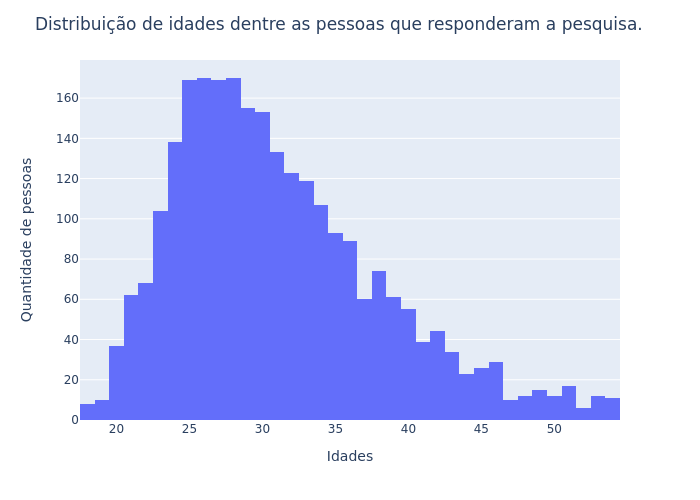

In [20]:
import plotly.express as px

fig = px.histogram(df_1, x="('P1_a ', 'Idade')").update_layout(
    title='Distribuição de idades dentre as pessoas que responderam a pesquisa.', 
    xaxis_title='Idades', 
    yaxis_title='Quantidade de pessoas'
)

fig.show("png")

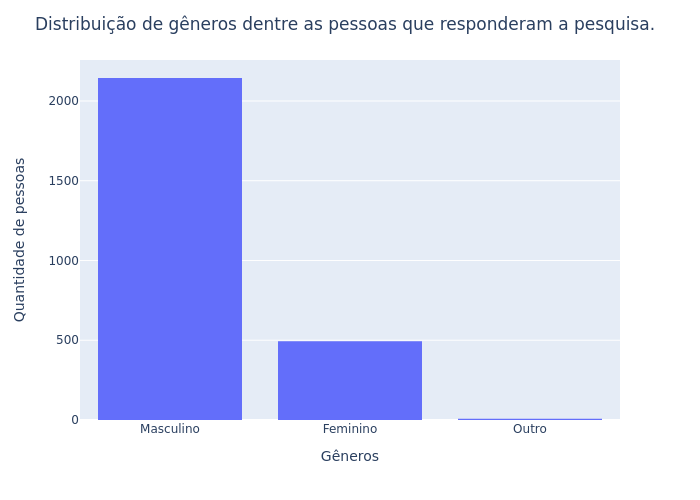

In [21]:
fig = px.histogram(df_1, x="('P1_b ', 'Genero')").update_layout(
    title='Distribuição de gêneros dentre as pessoas que responderam a pesquisa.', 
    xaxis_title='Gêneros', 
    yaxis_title='Quantidade de pessoas'
)

fig.show("png")

**Imprimindo mapas relacionados aos estados.**

## Mapa do Brasil

In [22]:
df_1

,"('P0', 'id')","('P1_a ', 'Idade')","('P1_a_a ', 'Faixa idade')","('P1_b ', 'Genero')","('P1_e ', 'Estado onde mora')","('P1_e_a ', 'uf onde mora')","('P1_e_b ', 'Regiao onde mora')","('P1_g_b ', 'Regiao de origem')","('P1_g_c ', 'Mudou de Estado?')","('P1_h ', 'Nivel de Ensino')","('P1_i ', 'Área de Formação')"
0,qkx4q0ei90wcjxnqkx4q0j3xgf0zn13s,38.0,35-39,Masculino,Ceará (CE),CE,Nordeste,NaN,0,Pós-graduação,Química / Física
1,zdl2n19yhgpnoaco6kkczdl2nwv9zwrt,39.0,35-39,Masculino,Bahia (BA),BA,Nordeste,Sudeste,1,Pós-graduação,Economia/ Administração / Contabilidade / Fina...
2,vsamqp2un3q7us84mgvsams5fulsmcoh,30.0,30-34,Masculino,Santa Catarina (SC),SC,Sul,NaN,0,Pós-graduação,Computação / Engenharia de Software / Sistemas...
3,v31ab41botodnsv31zgg4k34zzojy81l,38.0,35-39,Feminino,São Paulo (SP),SP,Sudeste,NaN,0,Pós-graduação,Outras
4,ubhu8ntvm4xc0sfkdubhu80e973eek0k,36.0,35-39,Masculino,Santa Catarina (SC),SC,Sul,NaN,0,Pós-graduação,Outras Engenharias
...,...,...,...,...,...,...,...,...,...,...,...
2640,07nvo8cdy377a46gon207nvjebwe65zg,40.0,40-44,Masculino,São Paulo (SP),SP,Sudeste,Sudeste,1,Não tenho graduação formal,NaN
2641,01mqnby32u01pg3nuj6vipp4mc06s8pg,27.0,25-29,Masculino,Santa Catarina (SC),SC,Sul,Sul,1,Graduação/Bacharelado,Estatística/ Matemática / Matemática Computaci...
2642,01fncs8qbhl9zx01fncs8rqib2zl3d18,24.0,22-24,Masculino,Santa Catarina (SC),SC,Sul,NaN,0,Graduação/Bacharelado,Computação / Engenharia de Software / Sistemas...
2643,075h3v2z19if04yn7o075h3vhifl38rw,38.0,35-39,Masculino,Rio de Janeiro (RJ),RJ,Sudeste,NaN,0,Graduação/Bacharelado,Computação / Engenharia de Software / Sistemas...


In [23]:
count_states = df_1.groupby(by=["('P1_e_a ', 'uf onde mora')"]).count().reset_index()
count_states

,"('P1_e_a ', 'uf onde mora')","('P0', 'id')","('P1_a ', 'Idade')","('P1_a_a ', 'Faixa idade')","('P1_b ', 'Genero')","('P1_e ', 'Estado onde mora')","('P1_e_b ', 'Regiao onde mora')","('P1_g_b ', 'Regiao de origem')","('P1_g_c ', 'Mudou de Estado?')","('P1_h ', 'Nivel de Ensino')","('P1_i ', 'Área de Formação')"
0,AL,14,14,14,14,14,14,0,14,14,13
1,BA,58,58,58,58,58,58,9,58,58,56
2,CE,68,67,68,68,68,68,11,68,68,66
3,DF,96,92,96,96,96,96,34,96,96,93
4,ES,32,32,32,32,32,32,4,32,32,32
5,Exterior,53,51,53,53,53,53,0,53,53,51
6,GO,57,57,57,57,57,57,17,57,57,57
7,MA,9,9,9,9,9,9,0,9,9,9
8,MG,341,336,341,341,341,341,36,341,341,335
9,MS,12,12,12,12,12,12,3,12,12,12


In [24]:
# !pip install geobr

In [25]:
import geobr 

In [26]:
states = geobr.read_state(year=2019, simplified=True)

In [27]:
states = states.merge(count_states, how="left", left_on="abbrev_state", right_on="('P1_e_a ', 'uf onde mora')")
states

,code_state,abbrev_state,name_state,code_region,name_region,geometry,"('P1_e_a ', 'uf onde mora')","('P0', 'id')","('P1_a ', 'Idade')","('P1_a_a ', 'Faixa idade')","('P1_b ', 'Genero')","('P1_e ', 'Estado onde mora')","('P1_e_b ', 'Regiao onde mora')","('P1_g_b ', 'Regiao de origem')","('P1_g_c ', 'Mudou de Estado?')","('P1_h ', 'Nivel de Ensino')","('P1_i ', 'Área de Formação')"
0,11.0,RO,Rondônia,1.0,Norte,"MULTIPOLYGON (((-65.38150 -10.42907, -65.37916...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12.0,AC,Acre,1.0,Norte,"MULTIPOLYGON (((-71.07772 -9.82774, -71.08554 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13.0,AM,Amazônas,1.0,Norte,"MULTIPOLYGON (((-69.83766 -3.68659, -69.71230 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,14.0,RR,Roraima,1.0,Norte,"MULTIPOLYGON (((-63.96008 2.47313, -63.96041 2...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15.0,PA,Pará,1.0,Norte,"MULTIPOLYGON (((-51.43248 -0.47334, -51.42843 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,16.0,AP,Amapá,1.0,Norte,"MULTIPOLYGON (((-50.45011 2.10924, -50.44252 2...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,17.0,TO,Tocantins,1.0,Norte,"MULTIPOLYGON (((-48.23163 -5.94614, -48.22940 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,21.0,MA,Maranhão,2.0,Nordeste,"MULTIPOLYGON (((-44.53830 -2.02124, -44.53542 ...",MA,9.0,9.0,9.0,9.0,9.0,9.0,0.0,9.0,9.0,9.0
8,22.0,PI,Piauí,2.0,Nordeste,"MULTIPOLYGON (((-42.91539 -6.64607, -42.91722 ...",PI,13.0,13.0,13.0,13.0,13.0,13.0,4.0,13.0,13.0,13.0
9,23.0,CE,Ceará,2.0,Nordeste,"MULTIPOLYGON (((-41.18292 -4.01797, -41.18862 ...",CE,68.0,67.0,68.0,68.0,68.0,68.0,11.0,68.0,68.0,66.0


In [28]:
states["('P0', 'id')"] = states["('P0', 'id')"].fillna(0)
states

,code_state,abbrev_state,name_state,code_region,name_region,geometry,"('P1_e_a ', 'uf onde mora')","('P0', 'id')","('P1_a ', 'Idade')","('P1_a_a ', 'Faixa idade')","('P1_b ', 'Genero')","('P1_e ', 'Estado onde mora')","('P1_e_b ', 'Regiao onde mora')","('P1_g_b ', 'Regiao de origem')","('P1_g_c ', 'Mudou de Estado?')","('P1_h ', 'Nivel de Ensino')","('P1_i ', 'Área de Formação')"
0,11.0,RO,Rondônia,1.0,Norte,"MULTIPOLYGON (((-65.38150 -10.42907, -65.37916...",NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12.0,AC,Acre,1.0,Norte,"MULTIPOLYGON (((-71.07772 -9.82774, -71.08554 ...",NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13.0,AM,Amazônas,1.0,Norte,"MULTIPOLYGON (((-69.83766 -3.68659, -69.71230 ...",NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,14.0,RR,Roraima,1.0,Norte,"MULTIPOLYGON (((-63.96008 2.47313, -63.96041 2...",NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15.0,PA,Pará,1.0,Norte,"MULTIPOLYGON (((-51.43248 -0.47334, -51.42843 ...",NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,16.0,AP,Amapá,1.0,Norte,"MULTIPOLYGON (((-50.45011 2.10924, -50.44252 2...",NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,17.0,TO,Tocantins,1.0,Norte,"MULTIPOLYGON (((-48.23163 -5.94614, -48.22940 ...",NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,21.0,MA,Maranhão,2.0,Nordeste,"MULTIPOLYGON (((-44.53830 -2.02124, -44.53542 ...",MA,9.0,9.0,9.0,9.0,9.0,9.0,0.0,9.0,9.0,9.0
8,22.0,PI,Piauí,2.0,Nordeste,"MULTIPOLYGON (((-42.91539 -6.64607, -42.91722 ...",PI,13.0,13.0,13.0,13.0,13.0,13.0,4.0,13.0,13.0,13.0
9,23.0,CE,Ceará,2.0,Nordeste,"MULTIPOLYGON (((-41.18292 -4.01797, -41.18862 ...",CE,68.0,67.0,68.0,68.0,68.0,68.0,11.0,68.0,68.0,66.0


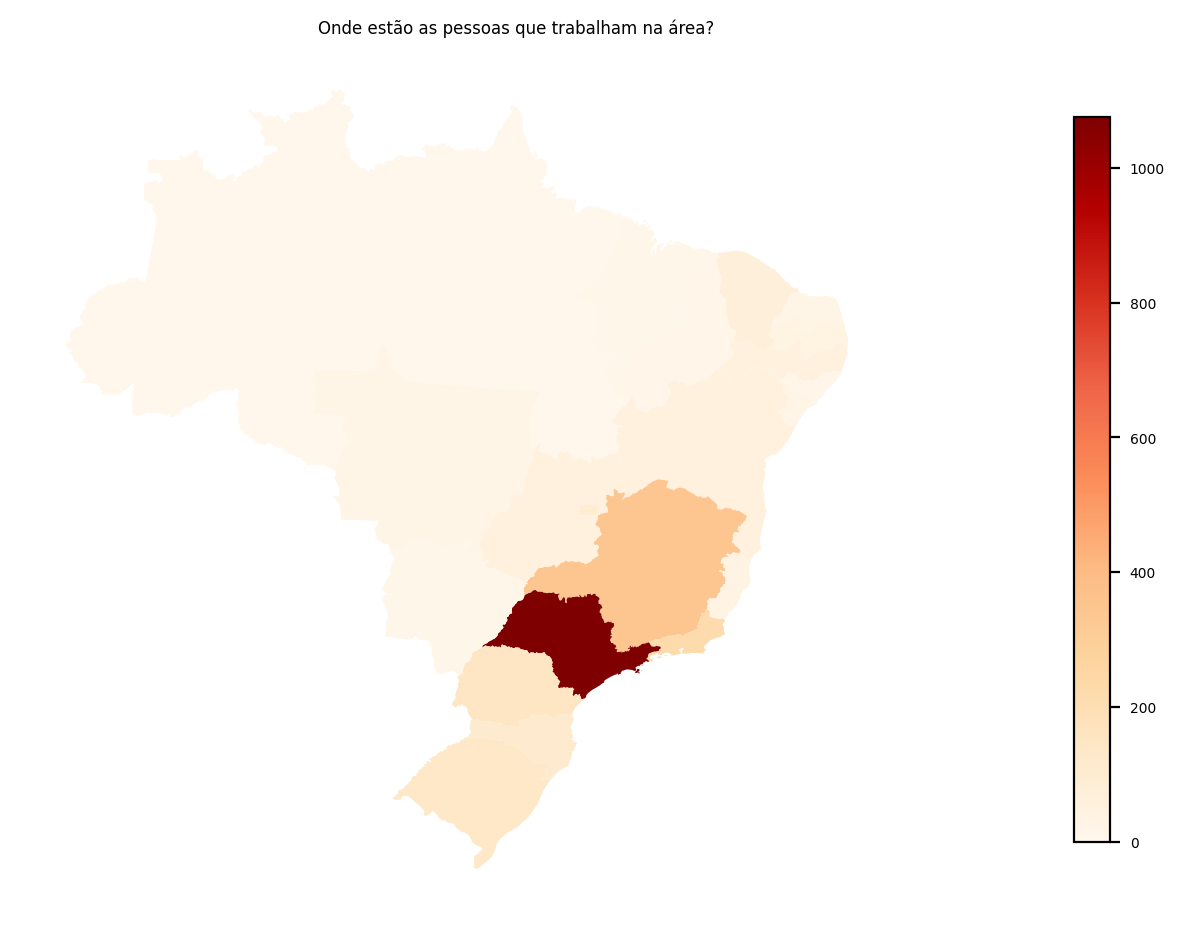

In [29]:
plt.rcParams.update({"font.size": 5})

fig, ax = plt.subplots(figsize=(8, 8), dpi=200)

states.plot(
    column="('P0', 'id')",
     cmap='OrRd',
     legend=True,
     legend_kwds={
         "shrink": 0.6
     },
     ax=ax
)
ax.set_title("Onde estão as pessoas que trabalham na área?")
ax.axis("off");

In [30]:
count_states__ = df_1.groupby(by=["('P1_e_a ', 'uf onde mora')"]).count()
count_states__

,"('P0', 'id')","('P1_a ', 'Idade')","('P1_a_a ', 'Faixa idade')","('P1_b ', 'Genero')","('P1_e ', 'Estado onde mora')","('P1_e_b ', 'Regiao onde mora')","('P1_g_b ', 'Regiao de origem')","('P1_g_c ', 'Mudou de Estado?')","('P1_h ', 'Nivel de Ensino')","('P1_i ', 'Área de Formação')"
"('P1_e_a ', 'uf onde mora')",,,,,,,,,,
AL,14,14,14,14,14,14,0,14,14,13
BA,58,58,58,58,58,58,9,58,58,56
CE,68,67,68,68,68,68,11,68,68,66
DF,96,92,96,96,96,96,34,96,96,93
ES,32,32,32,32,32,32,4,32,32,32
Exterior,53,51,53,53,53,53,0,53,53,51
GO,57,57,57,57,57,57,17,57,57,57
MA,9,9,9,9,9,9,0,9,9,9
MG,341,336,341,341,341,341,36,341,341,335


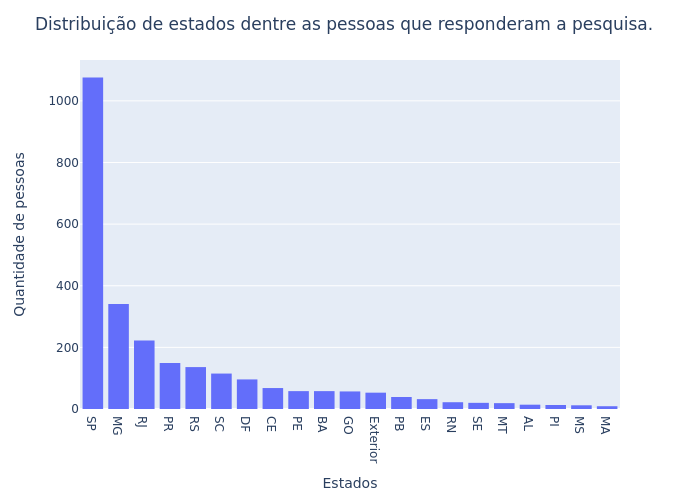

In [31]:
fig = px.histogram(df_1, x="('P1_e_a ', 'uf onde mora')").update_layout(
    title='Distribuição de estados dentre as pessoas que responderam a pesquisa.', 
    xaxis_title='Estados', 
    yaxis_title='Quantidade de pessoas', 
    xaxis={'categoryorder':'total descending'}
)

fig.show("png")

## Mais análises

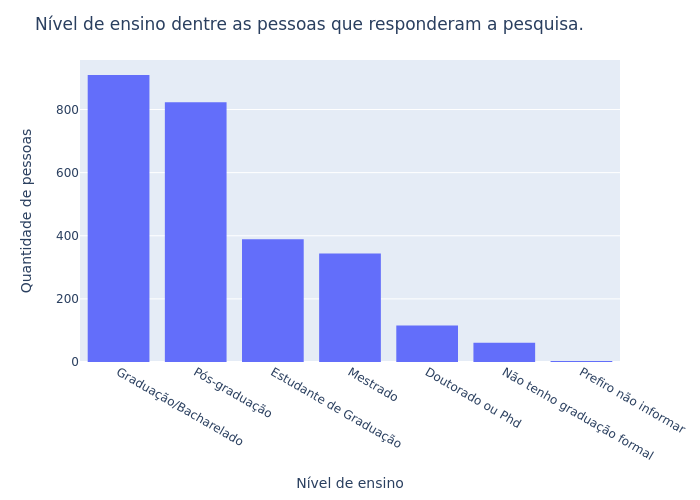

In [32]:
fig = px.histogram(df_1, x="('P1_h ', 'Nivel de Ensino')").update_layout(
    title='Nível de ensino dentre as pessoas que responderam a pesquisa.', 
    xaxis_title='Nível de ensino', 
    yaxis_title='Quantidade de pessoas', 
    xaxis={'categoryorder':'total descending'}
)

fig.show("png")

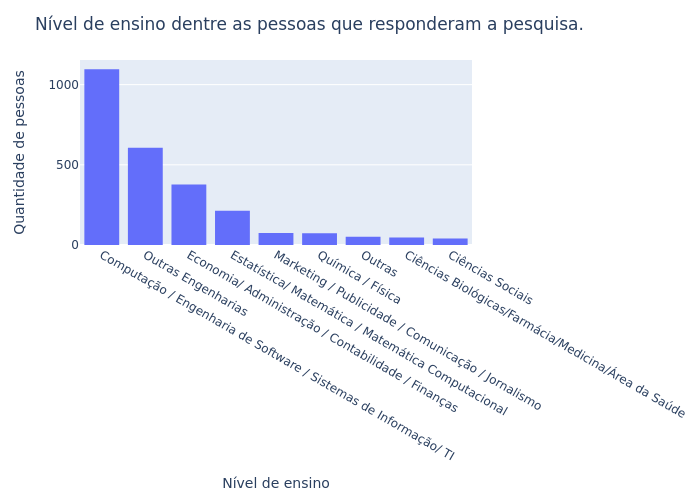

In [33]:
fig = px.histogram(df_1, x="('P1_i ', 'Área de Formação')").update_layout(
    title='Nível de ensino dentre as pessoas que responderam a pesquisa.', 
    xaxis_title='Nível de ensino', 
    yaxis_title='Quantidade de pessoas', 
    xaxis={'categoryorder':'total descending'}
)

fig.show("png")

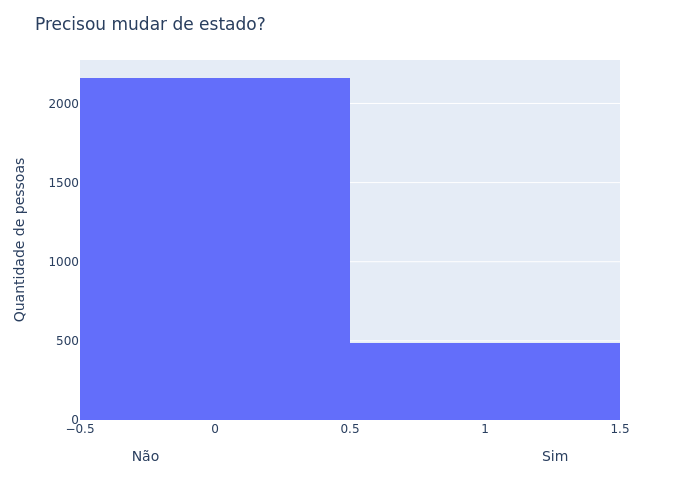

In [34]:
fig = px.histogram(df_1, x="('P1_g_c ', 'Mudou de Estado?')").update_layout(
    title='Precisou mudar de estado?', 
    xaxis_title='Não                                                                                      Sim', 
    yaxis_title='Quantidade de pessoas', 
    xaxis={'categoryorder':'total descending'}
)

fig.show("png")

# Visualização de dados: DataFrame 02

In [35]:
df_2

,"('P0', 'id')","('P2_a ', 'Qual sua situação atual de trabalho?')","('P2_b ', 'Setor')","('P2_c ', 'Numero de Funcionarios')","('P2_d ', 'Gestor?')","('P2_e ', 'Cargo como Gestor')","('P2_f ', 'Cargo Atual')","('P2_g ', 'Nivel')","('P2_h ', 'Faixa salarial')","('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')",...,"('P2_o_d ', 'Flexibilidade de trabalho remoto')","('P2_o_e ', 'Ambiente e clima de trabalho')","('P2_o_f ', 'Oportunidade de aprendizado e trabalhar com referências na área')","('P2_o_g ', 'Plano de carreira e oportunidades de crescimento profissional')","('P2_o_h ', 'Maturidade da empresa em termos de tecnologia e dados')","('P2_o_i ', 'Qualidade dos gestores e líderes')","('P2_o_j ', 'Reputação que a empresa tem no mercado')","('P2_q ', 'Atualmente qual a sua forma de trabalho?')","('P2_r ', 'Qual a forma de trabalho ideal para você?')","('P2_s ', 'Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?')"
0,qkx4q0ei90wcjxnqkx4q0j3xgf0zn13s,Empregado (CLT),Marketing,de 101 a 500,1.0,Supervisor/Coordenador,NaN,NaN,de R$ 4.001/mês a R$ 6.000/mês,Mais de 10 anos,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Modelo 100% presencial,Modelo híbrido com dias fixos de trabalho pres...,Vou aceitar e retornar ao modelo 100% presencial.
1,zdl2n19yhgpnoaco6kkczdl2nwv9zwrt,Empreendedor ou Empregado (CNPJ),Consultoria,de 1 a 5,1.0,"Sócio ou C-level (CEO, CDO, CIO, CTO etc)",NaN,NaN,de R$ 6.001/mês a R$ 8.000/mês,de 2 a 3 anos,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Modelo híbrido flexível (o funcionário tem lib...,Modelo 100% remoto,Vou procurar outra oportunidade no modelo 100%...
2,vsamqp2un3q7us84mgvsams5fulsmcoh,Empregado (CLT),Indústria,de 1001 a 3000,1.0,Supervisor/Coordenador,NaN,NaN,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Modelo 100% presencial,Modelo 100% remoto,Vou procurar outra oportunidade no modelo híbr...
3,v31ab41botodnsv31zgg4k34zzojy81l,Empreendedor ou Empregado (CNPJ),Serviços,de 1001 a 3000,1.0,Gerente/Head/Diretor/VP,NaN,NaN,de R$ 12.001/mês a R$ 16.000/mês,Mais de 10 anos,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Modelo 100% presencial,Modelo híbrido com dias fixos de trabalho pres...,Vou procurar outra oportunidade no modelo híbr...
4,ubhu8ntvm4xc0sfkdubhu80e973eek0k,Empreendedor ou Empregado (CNPJ),Varejo,de 6 a 10,1.0,Gerente/Head/Diretor/VP,NaN,NaN,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Modelo 100% presencial,Modelo 100% remoto,Vou procurar outra oportunidade no modelo 100%...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2640,07nvo8cdy377a46gon207nvjebwe65zg,Trabalho na área Acadêmica/Pesquisador,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2641,01mqnby32u01pg3nuj6vipp4mc06s8pg,Empregado (CLT),Tecnologia/Fábrica de Software,de 501 a 1000,0.0,NaN,Cientista de Dados/Data Scientist,Pleno,de R$ 6.001/mês a R$ 8.000/mês,de 4 a 5 anos,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,Modelo 100% presencial,Modelo 100% presencial,Vou aceitar e retornar ao modelo 100% presencial.
2642,01fncs8qbhl9zx01fncs8rqib2zl3d18,Empregado (CLT),Tecnologia/Fábrica de Software,Acima de 3000,0.0,NaN,Engenheiro de Dados/Data Engineer,Pleno,de R$ 6.001/mês a R$ 8.000/mês,de 2 a 3 anos,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Modelo 100% remoto,Modelo 100% remoto,Vou procurar outra oportunidade no modelo 100%...
2643,075h3v2z19if04yn7o075h3vhifl38rw,"Desempregado, buscando recolocação",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
print(df_2.columns.values.tolist())

["('P0', 'id')", "('P2_a ', 'Qual sua situação atual de trabalho?')", "('P2_b ', 'Setor')", "('P2_c ', 'Numero de Funcionarios')", "('P2_d ', 'Gestor?')", "('P2_e ', 'Cargo como Gestor')", "('P2_f ', 'Cargo Atual')", "('P2_g ', 'Nivel')", "('P2_h ', 'Faixa salarial')", "('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')", "('P2_j ', 'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?')", "('P2_k ', 'Você está satisfeito na sua empresa atual?')", "('P2_l ', 'Qual o principal motivo da sua insatisfação com a empresa atual?')", "('P2_l_a ', 'Falta de oportunidade de crescimento no emprego atual')", "('P2_l_b ', 'Salário atual não corresponde ao mercado')", "('P2_l_c ', 'Não tenho uma boa relação com meu líder/gestor')", "('P2_l_d ', 'Gostaria de trabalhar em em outra área de atuação')", "('P2_l_e ', 'Gostaria de receber mais benefícios')", "('P2_l_f ', 'O clima de trabalho/ambiente não é bom')", "('P2_

In [64]:
tmp = df_2.groupby(["('P2_a ', 'Qual sua situação atual de trabalho?')"])["('P2_a ', 'Qual sua situação atual de trabalho?')"].count().reset_index(name='count')

fig = px.pie(tmp, values='count', names="('P2_a ', 'Qual sua situação atual de trabalho?')", title='Situação atual de trabalho.')
fig.show()

In [69]:
tmp = df_2.groupby(["('P2_b ', 'Setor')"])["('P2_b ', 'Setor')"].count().reset_index(name='count')

fig = px.pie(tmp, values='count', names="('P2_b ', 'Setor')", title='Principais setores.')
fig.show()

In [71]:
tmp = df_2.groupby(["('P2_f ', 'Cargo Atual')"])["('P2_f ', 'Cargo Atual')"].count().reset_index(name='count')

fig = px.pie(tmp, values='count', names="('P2_f ', 'Cargo Atual')", title='Principais cargos.')
fig.show()

In [73]:
tmp = df_2.groupby(["('P2_g ', 'Nivel')"])["('P2_g ', 'Nivel')"].count().reset_index(name='count')

fig = px.pie(tmp, values='count', names="('P2_g ', 'Nivel')", title='Distribuição dos níveis.')
fig.show()

In [75]:
tmp = df_2.groupby(["('P2_h ', 'Faixa salarial')"])["('P2_h ', 'Faixa salarial')"].count().reset_index(name='count')

fig = px.pie(tmp, values='count', names="('P2_h ', 'Faixa salarial')", title='Faixa salarial.')
fig.show()

In [77]:
tmp = df_2.groupby(["('P2_q ', 'Atualmente qual a sua forma de trabalho?')"])["('P2_q ', 'Atualmente qual a sua forma de trabalho?')"].count().reset_index(name='count')

fig = px.pie(tmp, values='count', names="('P2_q ', 'Atualmente qual a sua forma de trabalho?')", title='Regime de trabalho.')
fig.show()

In [79]:
tmp = df_2.groupby(["('P2_s ', 'Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?')"])["('P2_s ', 'Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?')"].count().reset_index(name='count')

fig = px.pie(tmp, values='count', names="('P2_s ', 'Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?')", title='Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?')
fig.show()

In [37]:
text_1 = df_2["('P2_l ', 'Qual o principal motivo da sua insatisfação com a empresa atual?')"].unique()

In [38]:
val = str(text_1)
tokens = val.split()
for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
tokens = str(tokens)
tokens_1 = tokens.replace("'", " ").replace("nan", ' ').replace(",", " ")
tokens_1

'[ [    " o"   clima    de    trabalho/ambiente    não    é   "bom "  " falta"   de    maturidade    analítica    na   "empresa "  " gostaria"   de    trabalhar    em    em    outra    área    de    atuação     falta    de    maturidade    analítica    na    empresa     o    clima    de    trabalho/ambiente    não    é   "bom "  " falta"   de    oportunidade    de    crescimento    no    emprego    atual     gostaria    de    receber    mais   "benefícios "  " gostaria"   de    trabalhar    em    em    outra    área    de   "atuação "  " falta"   de    oportunidade    de    crescimento    no    emprego   "atual "  " falta"   de    maturidade    analítica    na    empresa     falta    de    oportunidade    de    crescimento    no    emprego    atual     gostaria    de    trabalhar    em    em    outra    área    de   "atuação "  " falta"   de    maturidade    analítica    na    empresa     gostaria    de    receber    mais   "benefícios "  " gostaria"   de    trabalhar    em    em    ou

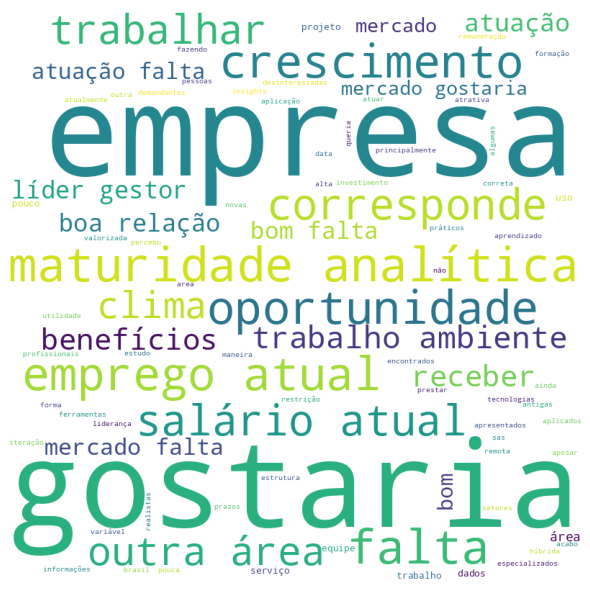

In [39]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(tokens_1)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [40]:
text_2 = df_2["('P2_o ', 'Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?')"].unique()

In [41]:
val = str(text_2)
tokens = val.split()
for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
tokens = str(tokens)
tokens_2 = tokens.replace("'", " ").replace("nan", ' ').replace(",", " ")
tokens_2

'["[ benefícios "  " flexibilidade"   de    trabalho   "remoto "  " oportunidade"   de    aprendizado    e    trabalhar    com    referências    na   "área "  " propósito"   do    trabalho    e    da    empresa     flexibilidade    de    trabalho    remoto    "remuneração/salário "  " maturidade"   da    empresa    em    termos    de    tecnologia    e    dados     propósito    do    trabalho    e    da    empresa    "remuneração/salário "  " remuneração/salário "   propósito    do    trabalho    e    da    empresa     plano    de    carreira    e    oportunidades    de    crescimento   "profissional "  " propósito"   do    trabalho    e    da    empresa     reputação    que    a    empresa    tem    no    mercado     plano    de    carreira    e    oportunidades    de    crescimento   "profissional "  " remuneração/salário "   maturidade    da    empresa    em    termos    de    tecnologia    e   "dados "  " remuneração/salário "   plano    de    carreira    e    oportunidades    de  

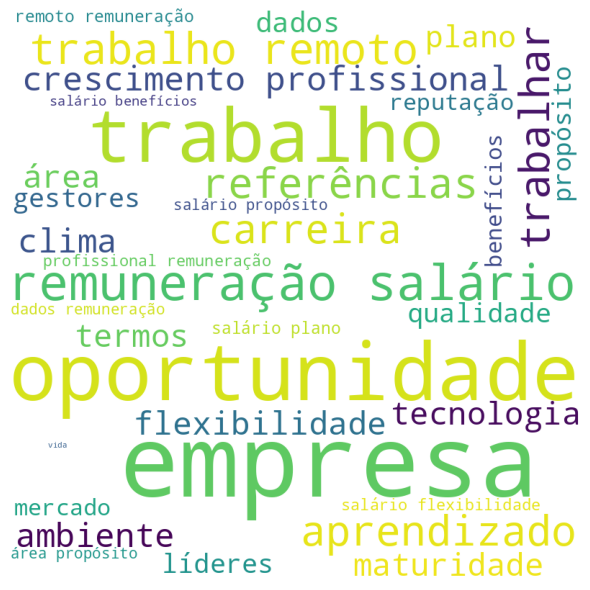

In [42]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(tokens_2)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [43]:
"('P2_l ', 'Qual o principal motivo da sua insatisfação com a empresa atual?')", "('P2_l_a ', 'Falta de oportunidade de crescimento no emprego atual')", "('P2_l_b ', 'Salário atual não corresponde ao mercado')", "('P2_l_c ', 'Não tenho uma boa relação com meu líder/gestor')", "('P2_l_d ', 'Gostaria de trabalhar em em outra área de atuação')", "('P2_l_e ', 'Gostaria de receber mais benefícios')", "('P2_l_f ', 'O clima de trabalho/ambiente não é bom')", "('P2_l_g ', 'Falta de maturidade analítica na empresa')", 

("('P2_l ', 'Qual o principal motivo da sua insatisfação com a empresa atual?')",
 "('P2_l_a ', 'Falta de oportunidade de crescimento no emprego atual')",
 "('P2_l_b ', 'Salário atual não corresponde ao mercado')",
 "('P2_l_c ', 'Não tenho uma boa relação com meu líder/gestor')",
 "('P2_l_d ', 'Gostaria de trabalhar em em outra área de atuação')",
 "('P2_l_e ', 'Gostaria de receber mais benefícios')",
 "('P2_l_f ', 'O clima de trabalho/ambiente não é bom')",
 "('P2_l_g ', 'Falta de maturidade analítica na empresa')")

In [44]:
print(df_2["('P2_l_a ', 'Falta de oportunidade de crescimento no emprego atual')"].value_counts())
print(df_2["('P2_l_b ', 'Salário atual não corresponde ao mercado')"].value_counts())
print(df_2["('P2_l_c ', 'Não tenho uma boa relação com meu líder/gestor')"].value_counts())
print(df_2["('P2_l_d ', 'Gostaria de trabalhar em em outra área de atuação')"].value_counts())
print(df_2["('P2_l_e ', 'Gostaria de receber mais benefícios')"].value_counts())
print(df_2["('P2_l_f ', 'O clima de trabalho/ambiente não é bom')"].value_counts())
print(df_2["('P2_l_g ', 'Falta de maturidade analítica na empresa')"].value_counts())

0.0    345
1.0    267
Name: ('P2_l_a ', 'Falta de oportunidade de crescimento no emprego atual'), dtype: int64
0.0    436
1.0    176
Name: ('P2_l_b ', 'Salário atual não corresponde ao mercado'), dtype: int64
0.0    573
1.0     39
Name: ('P2_l_c ', 'Não tenho uma boa relação com meu líder/gestor'), dtype: int64
0.0    394
1.0    218
Name: ('P2_l_d ', 'Gostaria de trabalhar em em outra área de atuação'), dtype: int64
0.0    548
1.0     64
Name: ('P2_l_e ', 'Gostaria de receber mais benefícios'), dtype: int64
0.0    533
1.0     79
Name: ('P2_l_f ', 'O clima de trabalho/ambiente não é bom'), dtype: int64
0.0    340
1.0    272
Name: ('P2_l_g ', 'Falta de maturidade analítica na empresa'), dtype: int64


In [45]:
data = {'Sim': [267,176,39,218,64,79,272],
        'Não': [345,436,573,394,548,533,340]}

data_reasons_1 = pd.DataFrame(data, index=['Falta de oportunidade de crescimento no emprego atual',
                                         'Salário atual não corresponde ao mercado',
                                         'Não tenho uma boa relação com meu líder/gestor',
                                         'Gostaria de trabalhar em em outra área de atuação',
                                         'Gostaria de receber mais benefícios',
                                         'O clima de trabalho/ambiente não é bom',
                                         'Falta de maturidade analítica na empresa'])

data_reasons_1 = data_reasons_1.reset_index()
data_reasons_1 = data_reasons_1.rename(columns = {'index':'Categorias'})
data_reasons_1

,Categorias,Sim,Não
0,Falta de oportunidade de crescimento no empreg...,267,345
1,Salário atual não corresponde ao mercado,176,436
2,Não tenho uma boa relação com meu líder/gestor,39,573
3,Gostaria de trabalhar em em outra área de atuação,218,394
4,Gostaria de receber mais benefícios,64,548
5,O clima de trabalho/ambiente não é bom,79,533
6,Falta de maturidade analítica na empresa,272,340


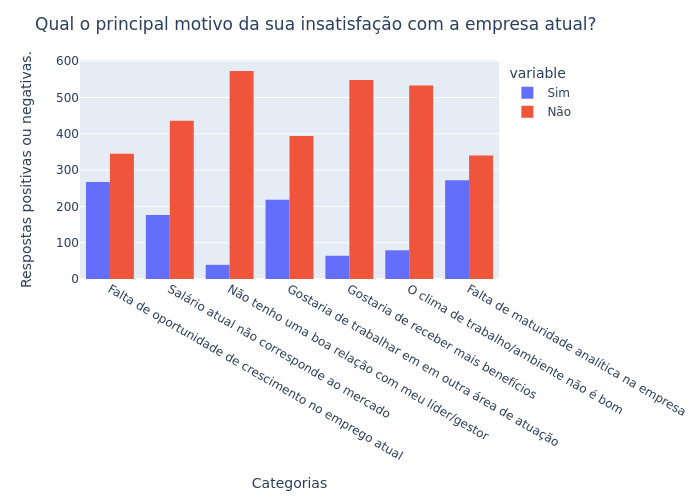

In [46]:
fig = px.histogram(
    data_frame = data_reasons_1,
    x = "Categorias",
    y = ["Sim","Não"],
    barmode = 'group').update_layout(
                        title='Qual o principal motivo da sua insatisfação com a empresa atual?', 
                        yaxis_title='Respostas positivas ou negativas.')

fig.show("png")

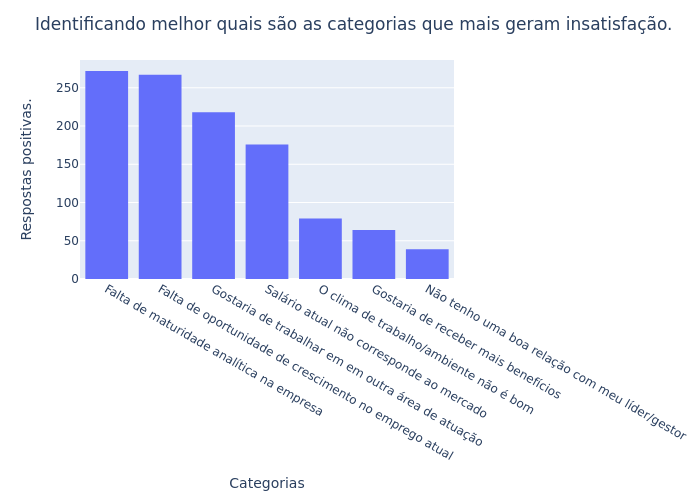

In [47]:
fig = px.histogram(data_reasons_1, x='Categorias', y='Sim').update_layout(
                        title='Identificando melhor quais são as categorias que mais geram insatisfação.', 
                        yaxis_title='Respostas positivas.',
                        xaxis={'categoryorder':'total descending'})

fig.show("png")

In [48]:
"('P2_o_a ', 'Remuneração/Salário')", "('P2_o_b ', 'Benefícios')", "('P2_o_c ', 'Propósito do trabalho e da empresa')", "('P2_o_d ', 'Flexibilidade de trabalho remoto')", "('P2_o_e ', 'Ambiente e clima de trabalho')", "('P2_o_f ', 'Oportunidade de aprendizado e trabalhar com referências na área')", "('P2_o_g ', 'Plano de carreira e oportunidades de crescimento profissional')", "('P2_o_h ', 'Maturidade da empresa em termos de tecnologia e dados')", "('P2_o_i ', 'Qualidade dos gestores e líderes')", "('P2_o_j ', 'Reputação que a empresa tem no mercado')",

("('P2_o_a ', 'Remuneração/Salário')",
 "('P2_o_b ', 'Benefícios')",
 "('P2_o_c ', 'Propósito do trabalho e da empresa')",
 "('P2_o_d ', 'Flexibilidade de trabalho remoto')",
 "('P2_o_e ', 'Ambiente e clima de trabalho')",
 "('P2_o_f ', 'Oportunidade de aprendizado e trabalhar com referências na área')",
 "('P2_o_g ', 'Plano de carreira e oportunidades de crescimento profissional')",
 "('P2_o_h ', 'Maturidade da empresa em termos de tecnologia e dados')",
 "('P2_o_i ', 'Qualidade dos gestores e líderes')",
 "('P2_o_j ', 'Reputação que a empresa tem no mercado')")

In [49]:
print(df_2["('P2_o_a ', 'Remuneração/Salário')"].value_counts())
print(df_2["('P2_o_b ', 'Benefícios')"].value_counts())
print(df_2["('P2_o_c ', 'Propósito do trabalho e da empresa')"].value_counts())
print(df_2["('P2_o_d ', 'Flexibilidade de trabalho remoto')"].value_counts())
print(df_2["('P2_o_e ', 'Ambiente e clima de trabalho')"].value_counts())
print(df_2["('P2_o_f ', 'Oportunidade de aprendizado e trabalhar com referências na área')"].value_counts())
print(df_2["('P2_o_g ', 'Plano de carreira e oportunidades de crescimento profissional')"].value_counts())
print(df_2["('P2_o_h ', 'Maturidade da empresa em termos de tecnologia e dados')"].value_counts())
print(df_2["('P2_o_i ', 'Qualidade dos gestores e líderes')"].value_counts())
print(df_2["('P2_o_j ', 'Reputação que a empresa tem no mercado')"].value_counts())

1.0    1660
0.0     700
Name: ('P2_o_a ', 'Remuneração/Salário'), dtype: int64
0.0    2016
1.0     344
Name: ('P2_o_b ', 'Benefícios'), dtype: int64
0.0    1816
1.0     544
Name: ('P2_o_c ', 'Propósito do trabalho e da empresa'), dtype: int64
0.0    1388
1.0     972
Name: ('P2_o_d ', 'Flexibilidade de trabalho remoto'), dtype: int64
0.0    1839
1.0     521
Name: ('P2_o_e ', 'Ambiente e clima de trabalho'), dtype: int64
0.0    1444
1.0     916
Name: ('P2_o_f ', 'Oportunidade de aprendizado e trabalhar com referências na área'), dtype: int64
0.0    1513
1.0     847
Name: ('P2_o_g ', 'Plano de carreira e oportunidades de crescimento profissional'), dtype: int64
0.0    1961
1.0     399
Name: ('P2_o_h ', 'Maturidade da empresa em termos de tecnologia e dados'), dtype: int64
0.0    2164
1.0     196
Name: ('P2_o_i ', 'Qualidade dos gestores e líderes'), dtype: int64
0.0    2230
1.0     130
Name: ('P2_o_j ', 'Reputação que a empresa tem no mercado'), dtype: int64


In [50]:
data = {'Sim': [1660,344,544,972,521,916,847,399,196,130],
        'Não': [700,2016,1816,1388,1839,1444,1513,1961,2164,2230]}

data_reasons_2 = pd.DataFrame(data, index=['Remuneração/Salário', 
                                         'Benefícios', 
                                         'Propósito do trabalho e da empresa', 
                                         'Flexibilidade de trabalho remoto', 
                                         'Ambiente e clima de trabalho', 
                                         'Oportunidade de aprendizado e trabalhar com referências na área', 
                                         'Plano de carreira e oportunidades de crescimento profissional', 
                                         'Maturidade da empresa em termos de tecnologia e dados',
                                         'Qualidade dos gestores e líderes', 
                                         'Reputação que a empresa tem no mercado'])

data_reasons_2 = data_reasons_2.reset_index()
data_reasons_2 = data_reasons_2.rename(columns = {'index':'Categorias'})
data_reasons_2

,Categorias,Sim,Não
0,Remuneração/Salário,1660,700
1,Benefícios,344,2016
2,Propósito do trabalho e da empresa,544,1816
3,Flexibilidade de trabalho remoto,972,1388
4,Ambiente e clima de trabalho,521,1839
5,Oportunidade de aprendizado e trabalhar com re...,916,1444
6,Plano de carreira e oportunidades de crescimen...,847,1513
7,Maturidade da empresa em termos de tecnologia ...,399,1961
8,Qualidade dos gestores e líderes,196,2164
9,Reputação que a empresa tem no mercado,130,2230


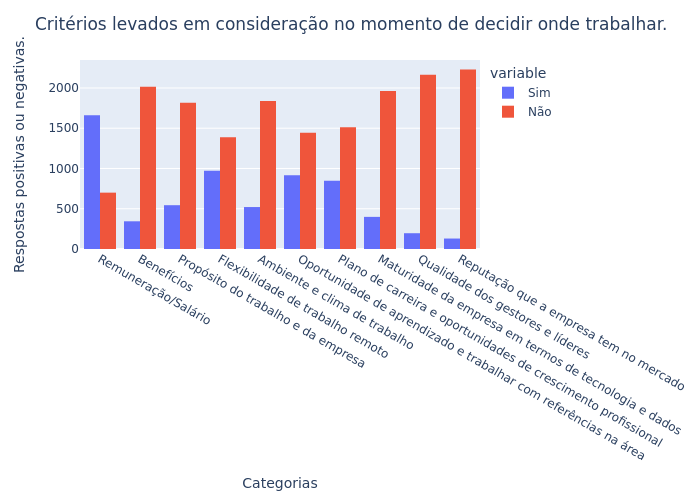

In [51]:
fig = px.histogram(
    data_frame = data_reasons_2,
    x = "Categorias",
    y = ["Sim","Não"],
    barmode = 'group').update_layout(
                        title='Critérios levados em consideração no momento de decidir onde trabalhar.',
                        yaxis_title='Respostas positivas ou negativas.')

fig.show("png")

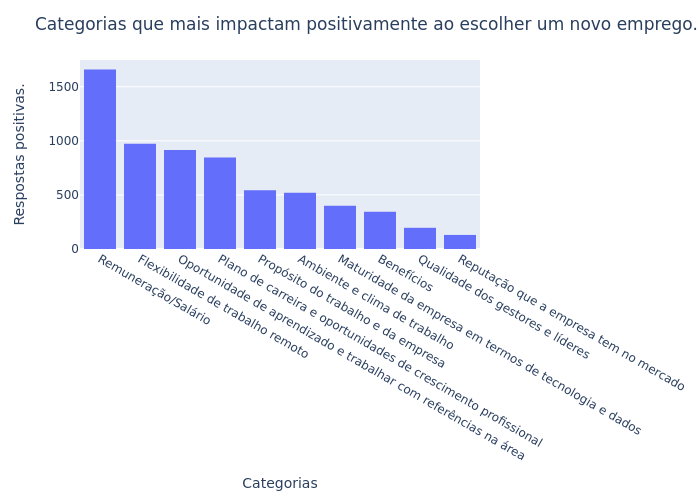

In [52]:
fig = px.histogram(data_reasons_2, x='Categorias', y='Sim').update_layout(
                        title='Categorias que mais impactam positivamente ao escolher um novo emprego.', 
                        yaxis_title='Respostas positivas.',
                        xaxis={'categoryorder':'total descending'})

fig.show("png")